# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd
from scipy import stats
import numpy as np
import scipy.stats

df = pd.read_csv('data/human_body_temperature.csv')

In [2]:
# Your work here.
#Analyzing the data set:
df.head(5)
df.tail(5)

,temperature,gender,heart_rate
125,96.3,M,70.0
126,97.7,M,77.0
127,98.2,F,73.0
128,97.9,M,72.0
129,98.7,F,59.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


## 1.

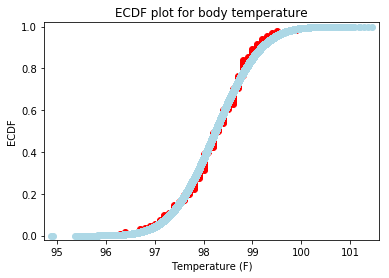

In [4]:
import matplotlib.pyplot as plt
import numpy as np

def ecdf(data):  
    # Number of data points: n
    n = len(data)
    # x-data for the ECDF: x
    x = np.sort(data)
    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n
    
    return x, y


x_temperature,y_temperature = ecdf(df.temperature)

_=plt.plot(x_temperature,y_temperature,marker="o",linestyle="none",color="red")

_=plt.xlabel("Temperature (F)")
_=plt.ylabel("ECDF")
_=plt.title("ECDF plot for body temperature")

#Creating the normal cdf for comparison
samples=np.random.normal(np.mean(df.temperature),np.std(df.temperature),size=100000)
x,y = ecdf(samples)
_=plt.plot(x,y,marker="o",linestyle="none",color="lightblue")
plt.margins(0.02)
plt.show()

The ecdf and normal cdf comparison suggests that our distribution is nearly normal.

In [5]:
#Further examination:
print(stats.normaltest(df.temperature))

NormaltestResult(statistic=2.7038014333192031, pvalue=0.2587479863488254)


We cannot reject the null hypothesis as p > 0.05. Thus, the distribution of temperature is normal.

## 2.

The sample size is not significant but is greater than 30. Thus, assuming minimal sampling bias at our source,
we can conclude that our temperature samples are independent.

## 3.

This is a one sample test since the second distribution is unknown.Since we have over 30 observations, we could use 
the z-test as the preferred method. Although, the standard deviation of the study is unknown, we can use the
sample standard deviation as optimal parameter

Z-statistic and p-value for one mean/sample z-test:

H_o : mu = 98.6
H_a : mu < 98.6 (considering one tail test)

In [6]:
# Given:
sample_mean1 = df.temperature.mean()
sample_std1 = df.temperature.std()
expected_mean1 = 98.6
n1 = len(df.temperature)

# Calculated:
se1 = sample_std1 / np.sqrt(n1)
zscore1 = (sample_mean1 - expected_mean1) / se1
p1=scipy.stats.norm.cdf(zscore1) 



In [7]:
print("z-score: {}".format(zscore1))
print("p-value corresponding to z-test: {}".format(p1))

z-score: -5.454823292364079
p-value corresponding to z-test: 2.45107850705669e-08


Z-test suggests that we reject the null at 95% confidence. The mean body temperature is less than 98.6 F

In [8]:
# T-statistic and p-value:
one_sample = scipy.stats.ttest_1samp(a = df.temperature.values.reshape(1,-1), popmean = 98.6, axis=None)
print(one_sample)

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)


T-test suggests that we reject the null at 95% confidence. The mean body temperature is less than to 98.6 

Inference:
     At high degrees of freedom (> 30), the t-distribution is identical to normal distribution. Thus, the 
     corresponding test statistics are similar.

## 4.

In [9]:
from scipy import stats
import numpy as np
import scipy.stats

# Drawing a small sample size =10.
df_sample = df.sample(n=10,random_state=42)

# Z-statistic and p-value:
sample_mean2 = df_sample.temperature.mean()
sample_std2 = df_sample.temperature.std()
expected_mean2 = 98.6
n2 = len(df_sample.temperature)
se2 = sample_std2 / np.sqrt(n2)
zscore2 = (sample_mean2 - expected_mean2) / se2
p2=scipy.stats.norm.cdf(zscore2)
print("z-score: {}".format(zscore2))
print("p-value corresponding to z-test: {}".format(p2))


z-score: -1.5606191828511506
p-value corresponding to z-test: 0.059306814951265774


Z-test suggests that we do not reject the null at 95% confidence but we may reject it at 90% confidence.
The mean body temperature is 98.6.



In [10]:
# T-statistic and p-value:
one_sample2 = scipy.stats.ttest_1samp(a = df_sample.temperature.values.reshape(1,-1), popmean = 98.6, axis=None)
print(one_sample2)

Ttest_1sampResult(statistic=-1.5606191828511504, pvalue=0.15304624869561917)


T-test suggests that we do not reject the null at 95% or 90% confidence . The mean body temperature is 98.6.

From smaller sample sizes the t-test is more robust. This is because the thick tail of t-distribution reduces the
error in Standard Error calculations for a small sample size.

## 5.

Boot strap replication CI : [ 98.12536538  98.37461538]


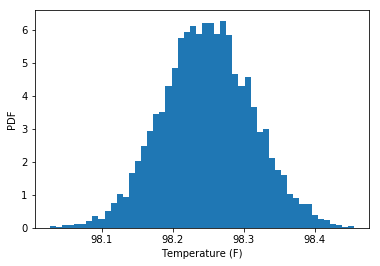

In [11]:
# Bootstrap Approach for CI:
def bootstrap_replicate_1d(data, func):
    
    return func(np.random.choice(data, size=len(data)))

def draw_bs_reps(data, func, size=1):
    bs_replicates = np.empty(size)
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data,func)
    
    return bs_replicates


bs_replicates = draw_bs_reps(df.temperature,np.mean,10000)
conf_int = np.percentile(bs_replicates,[2.5,97.5])

print("Boot strap replication CI :",conf_int)

_ = plt.hist(bs_replicates, bins=50, normed=True)
_ = plt.xlabel("Temperature (F)")
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

Abnormal or extreme points would be those lying outside the 95% confidence interval. Thus, abnormality would
in part be defined, based upon our underlying significance level for the test.

All temperatures outside the interval [98.1254, 98.3746] would be considered abnormal.

## 6.

In [13]:
data_males = df.loc[df['gender'] == 'M']
data_females = df.loc[df['gender'] == 'F']
mean_temp_males = np.mean(data_males.temperature)
mean_temp_females = np.mean(data_females.temperature)
print("Observed mean body temperature for men: {}".format(mean_temp_males))
print("Observed mean body temperature for women: {}".format(mean_temp_females))
bt_males = data_males['temperature'].values
bt_females = data_females['temperature'].values

Observed mean body temperature for men: 98.1046153846154
Observed mean body temperature for women: 98.39384615384613


H_o : Mean body temperatures of men and women are the same.
H_a : Mean body temperatures of men and women are different.

We use a two sample bootstrap test as well as a 2 sample t-test for our calculations



In [14]:
#List of functions for this excercise:

def draw_bs_reps(data, func, size=1):
    bs_replicates = np.empty(size)

    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data,func)

    return bs_replicates


def draw_perm_reps(data_1, data_2, func, size=1):
    perm_replicates = np.empty(size)

    for i in range(size):
        perm_sample_1, perm_sample_2 = permutation_sample(data_1,data_2)
        perm_replicates[i] = func(perm_sample_1,perm_sample_2)

    return perm_replicates


def diff_of_means(data_1, data_2):
    diff = np.mean(data_1)-np.mean(data_2)
    
    return diff

In [15]:
# 2 sample Bootstrap Testing:

#Calculations:
empirical_diff_means = diff_of_means(bt_males,bt_females)
bt_concat = np.concatenate((bt_males,bt_females))
mean_bt_all = np.mean(bt_concat)

bt_males_shifted = bt_males - np.mean(bt_males) + mean_bt_all
bt_females_shifted = bt_females - np.mean(bt_females) + mean_bt_all

In [16]:
# Result of booststrap testing:
bs_replicates_males = draw_bs_reps(bt_males_shifted, np.mean, 10000)
bs_replicates_females = draw_bs_reps(bt_females_shifted, np.mean, 10000)

bs_replicates = bs_replicates_males - bs_replicates_females

p = np.sum(bs_replicates < empirical_diff_means) / len(bs_replicates)
print('p-value =', p)

p-value = 0.0144


Thus, we can reject the null. The mean difference in body temperature is for men and women is greater than 0.

In [17]:
# Confirm with 2-sample t-test:
tstat, pvalue = scipy.stats.ttest_ind(bt_males, bt_females, equal_var=True, nan_policy='propagate')
print("p-value corresponding to 2-sample t-test: {}".format(pvalue/2)) #one-tail

p-value corresponding to 2-sample t-test: 0.011965941561197804
